### Import Library

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf

### Import dataset

In [74]:
df = pd.read_csv('Hotel Reservations.csv')

### Melihat bentuk dari dataset

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [76]:
df.head(10)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
5,INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,Canceled
6,INN00007,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,0,0,0,107.55,1,Not_Canceled
7,INN00008,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,26,Online,0,0,0,105.61,1,Not_Canceled
8,INN00009,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,7,6,Offline,0,0,0,96.90,1,Not_Canceled
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,2018,10,18,Online,0,0,0,133.44,3,Not_Canceled


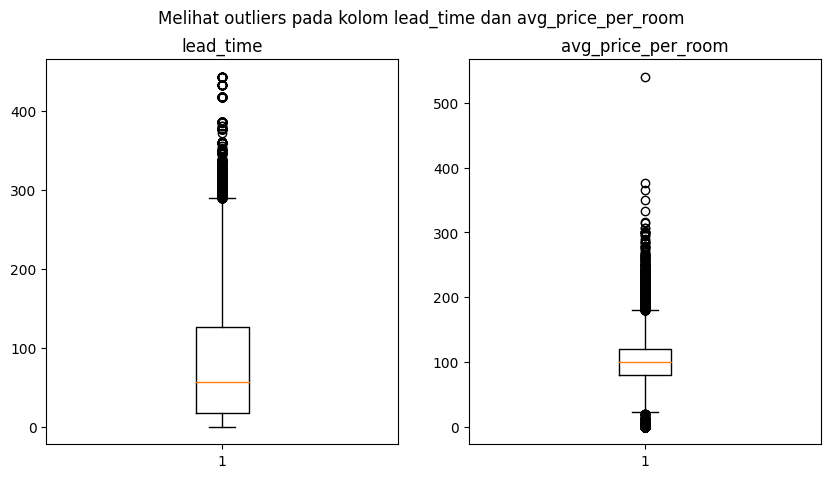

In [77]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('lead_time')
plt.boxplot(df['lead_time'])
plt.subplot(1, 2, 2)
plt.title('avg_price_per_room')
plt.boxplot(df['avg_price_per_room'])
plt.suptitle('Melihat outliers pada kolom lead_time dan avg_price_per_room')
plt.show()

##### Membersihkan Outliers

In [78]:
Q1_lead = df['lead_time'].quantile(0.25)
Q3_lead = df['lead_time'].quantile(0.75)
IQR = Q3_lead - Q1_lead
lower_bound = Q1_lead - 1.5 * IQR
upper_bound = Q3_lead + 1.5 * IQR
df['lead_time'] = df['lead_time'].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

Q1_price = df['avg_price_per_room'].quantile(0.25)
price = df['avg_price_per_room'].quantile(0.75)
IQR = price - Q1_price
lower_bound = Q1_price - 1.5 * IQR
upper_bound = price + 1.5 * IQR
df['avg_price_per_room'] = df['avg_price_per_room'].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

##### Kondisi data setelah di bersihkan

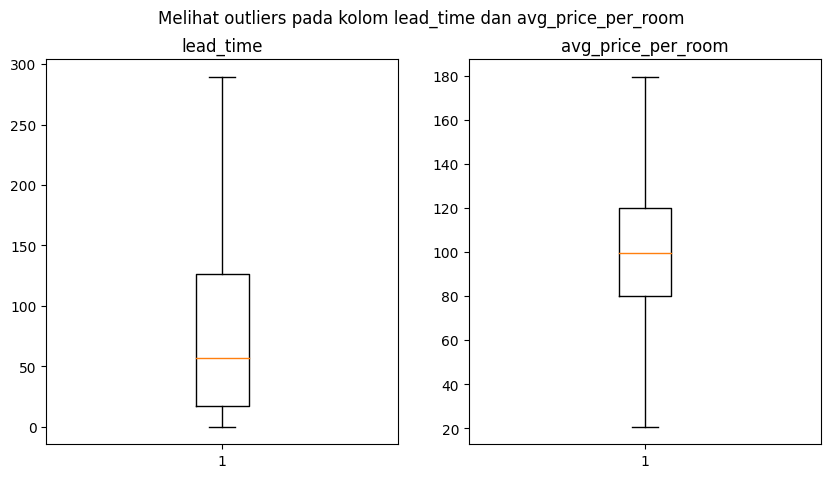

In [79]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('lead_time')
plt.boxplot(df['lead_time'])
plt.subplot(1, 2, 2)
plt.title('avg_price_per_room')
plt.boxplot(df['avg_price_per_room'])
plt.suptitle('Melihat outliers pada kolom lead_time dan avg_price_per_room')
plt.show()

### Melihat korelasi dari setiap feature menggunakan heatmap

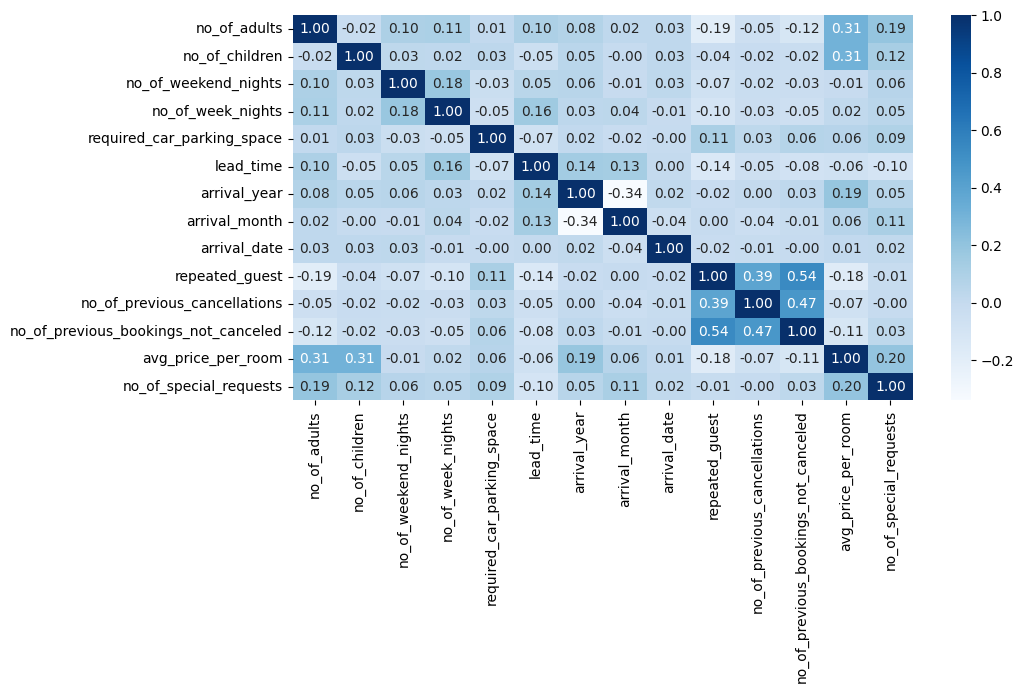

In [80]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(numeric_only=True), cbar=True, annot=True, cmap='Blues', fmt='.2f')
plt.show()

### Data Preprocessing

In [81]:
# Melakukan normalisasi data
min_max_scaler = MinMaxScaler()
df[['lead_time', 'avg_price_per_room']] = min_max_scaler.fit_transform(df[['lead_time', 'avg_price_per_room']])

# Menghapus kolom yang tidak diperlukan
df.drop(['Booking_ID'], axis=1, inplace=True)

# Mengubah data kategorikal menjadi numerikal
col=['type_of_meal_plan','room_type_reserved','booking_status','market_segment_type']
le=LabelEncoder()
for i in col:
    df[i]=le.fit_transform(df[i])

df.head(10)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,0,0,0,0.773748,2017,10,2,3,0,0,0,0.278652,0,1
1,2,0,2,3,3,0,0,0.017271,2018,11,6,4,0,0,0,0.541121,1,1
2,1,0,2,1,0,0,0,0.003454,2018,2,28,4,0,0,0,0.247166,0,0
3,2,0,0,2,0,0,0,0.728843,2018,5,20,4,0,0,0,0.499055,0,0
4,2,0,1,1,3,0,0,0.165803,2018,4,11,4,0,0,0,0.464421,0,0
5,2,0,0,2,1,0,0,1.000000,2018,9,13,4,0,0,0,0.593514,1,0
6,2,0,1,3,0,0,0,0.117444,2017,10,15,4,0,0,0,0.546599,1,1
7,2,0,1,3,0,0,3,0.286701,2018,12,26,4,0,0,0,0.534383,1,1
8,3,0,0,4,0,0,0,0.417962,2018,7,6,3,0,0,0,0.479534,1,1
9,2,0,0,5,0,0,3,0.151986,2018,10,18,4,0,0,0,0.709635,3,1


### Membagi data menjadi data training dan data testing

In [82]:
X = df.drop(['booking_status'], axis=1)
y = df['booking_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Membuat model neural network

In [83]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [84]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 16)                288       
                                                                 
 dense_13 (Dense)            (None, 32)                544       
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 865
Trainable params: 865
Non-trainable params: 0
_________________________________________________________________


### Compile Model

In [85]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

### Fitting Model

In [86]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)

history = model.fit(
    x=X_train, 
    y=y_train, 
    epochs=100, 
    batch_size=16, 
    verbose=1, 
    validation_data=(X_test, y_test),
    callbacks=[callback]
)

Epoch 1/100


1814/1814 [==============================] - 3s 1ms/step - loss: 1.0320 - accuracy: 0.6175 - val_loss: 0.6351 - val_accuracy: 0.5997
Epoch 2/100
1814/1814 [==============================] - 2s 999us/step - loss: 0.7592 - accuracy: 0.6562 - val_loss: 0.8594 - val_accuracy: 0.6675
Epoch 3/100
1814/1814 [==============================] - 2s 996us/step - loss: 0.7484 - accuracy: 0.6721 - val_loss: 1.6249 - val_accuracy: 0.6670
Epoch 4/100
1814/1814 [==============================] - 2s 1ms/step - loss: 0.6696 - accuracy: 0.6972 - val_loss: 0.4652 - val_accuracy: 0.7850
Epoch 5/100
1814/1814 [==============================] - 2s 1ms/step - loss: 0.6876 - accuracy: 0.6978 - val_loss: 0.4999 - val_accuracy: 0.7647
Epoch 6/100
1814/1814 [==============================] - 2s 1ms/step - loss: 0.6310 - accuracy: 0.7132 - val_loss: 0.5124 - val_accuracy: 0.7566
Epoch 7/100
1814/1814 [==============================] - 2s 1ms/step - loss: 0.6515 - accuracy: 0.7135 - val_loss: 0.4672 - val_accuracy: 

### Evaluasi Model

In [87]:
model.evaluate(X_test, y_test)

  1/227 [..............................] - ETA: 4s - loss: 0.2427 - accuracy: 0.9062

227/227 [==============================] - 0s 951us/step - loss: 0.4646 - accuracy: 0.7859


[0.46460017561912537, 0.7859407067298889]

In [88]:
print(classification_report(y_test, model.predict(X_test).round(), target_names=['Canceled', 'Not Canceled']))

227/227 [==============================] - 0s 619us/step
              precision    recall  f1-score   support

    Canceled       0.82      0.46      0.59      2416
Not Canceled       0.78      0.95      0.86      4839

    accuracy                           0.79      7255
   macro avg       0.80      0.70      0.72      7255
weighted avg       0.79      0.79      0.77      7255



227/227 [==============================] - 0s 571us/step


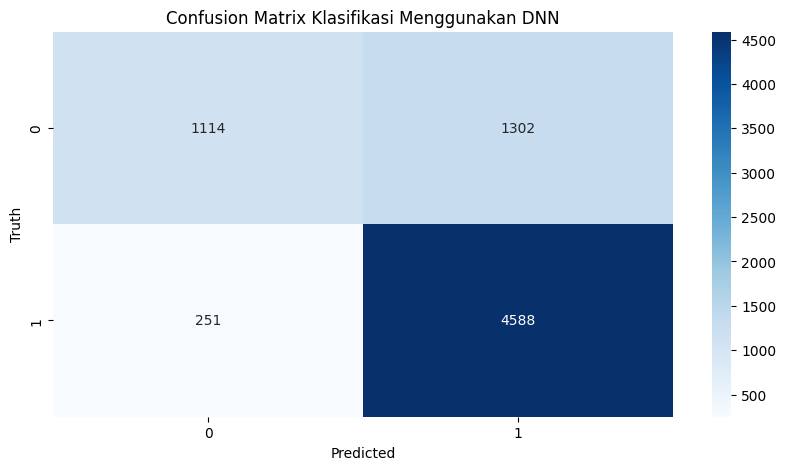

In [89]:
y_pred = model.predict(X_test)
y_pred = y_pred.round()
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 5))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
plt.title('Confusion Matrix Klasifikasi Menggunakan DNN')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

### Pergerakan akurasi dan loss pada saat training dan validation

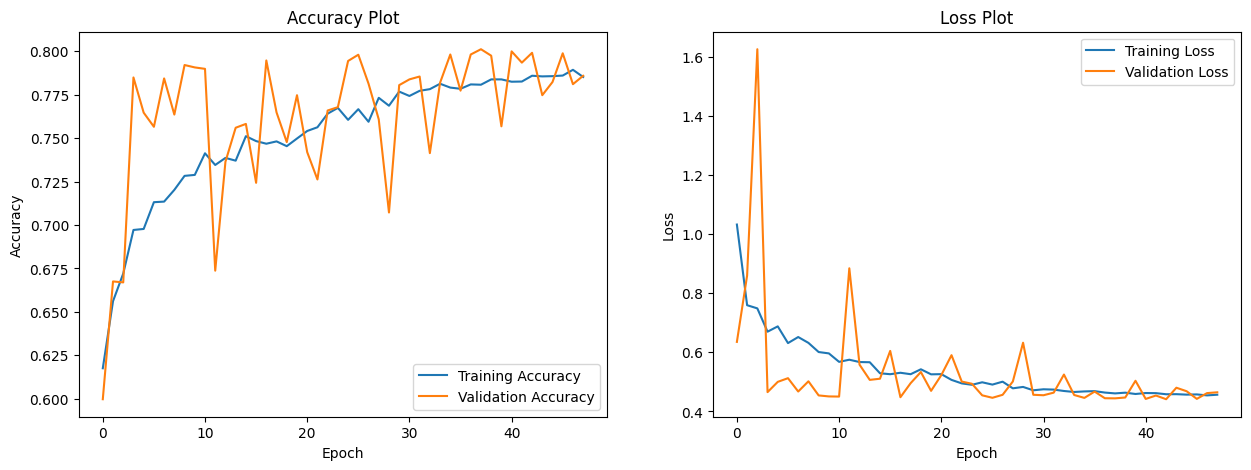

In [90]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()